# DL 2: Implementing Feedforward neural networks with Keras and TensorFlow 

In [1]:
#a. Import the necessary packages 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#b. Load the training and testing data (MNIST/CIFAR10)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# with np.load(r"mnist_dataset.npz") as data:
#     x_train = data["X_train"]
#     y_train = data["y_train"]
#     x_test = data["X_test"]
#     y_test = data["y_test"]

# print("Loaded MNIST dataset locally!")
# print("Training data shape:", x_train.shape)
# print("Test data shape:", x_test.shape) 

In [4]:
# Normalize pixel values
x_train = x_train / 255
x_test = x_test / 255

In [5]:
# c. Define the network architecture using Keras 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

C:\Users\Yash\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# d. Train the model using SGD 
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [7]:
# Train model for 10 epochs with validation
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                   batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.3221 - loss: 1.8775 - val_accuracy: 0.3975 - val_loss: 1.7074
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.3937 - loss: 1.6938 - val_accuracy: 0.4296 - val_loss: 1.6197
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4216 - loss: 1.6146 - val_accuracy: 0.4391 - val_loss: 1.5667
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4443 - loss: 1.5604 - val_accuracy: 0.4558 - val_loss: 1.5310
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4561 - loss: 1.5257 - val_accuracy: 0.4471 - val_loss: 1.5554
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4683 - loss: 1.4936 - val_accuracy: 0.4630 - val_loss: 1.5067
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4793 - loss: 1.4648 - val_accuracy: 0.4495 - val_loss: 1.5482
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4857 - loss: 1.4474 - 

In [8]:
# e. Evaluate the network
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4748 - loss: 1.4930
Test Accuracy: 0.4747999906539917
Test Loss: 1.492985486984253


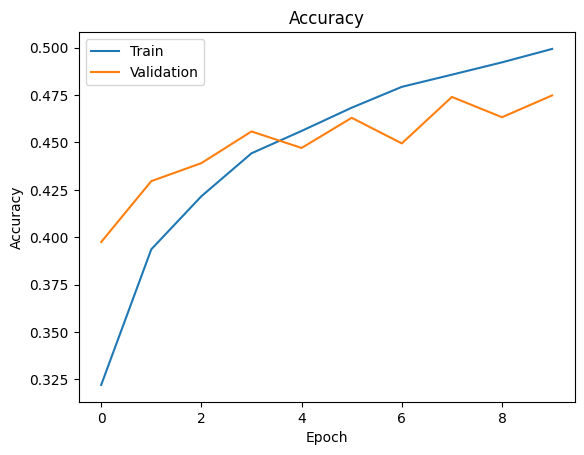

In [9]:
# Plot the training loss and accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

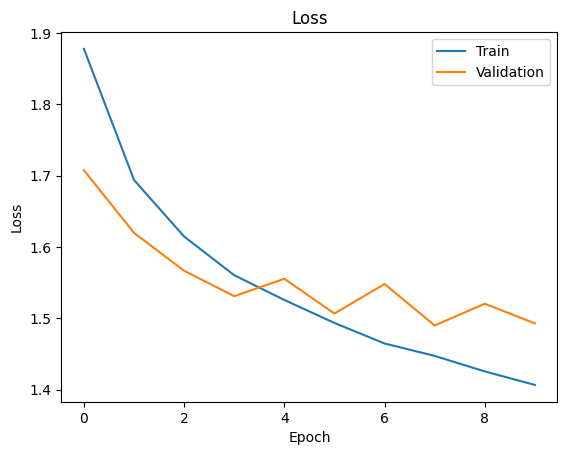

In [10]:
# f. Plot the training loss and accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()

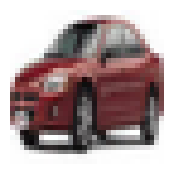

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Predicted: car
Actual:    car


In [17]:
# CIFAR-10 class names
class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Pick a random sample
index = np.random.randint(0, len(x_test)-1)

# Show the image (avoid blur with interpolation='nearest')
plt.figure(figsize=(2,2))
plt.imshow(x_test[index], interpolation='nearest')
plt.axis('off')
plt.show()

# Predict
prediction = model.predict(x_test)
predicted_label = np.argmax(prediction[index])

# Extract actual label properly (handles both (n,) and (n,1) formats)
actual_label = y_test[index][0] if y_test.ndim == 2 else y_test[index]

print(f"Predicted: {class_names[predicted_label]}")
print(f"Actual:    {class_names[actual_label]}")